In [1]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

spark = SparkSession.builder.master("local[*]")  \
        .appName("Amazon Reviews Sentiment Analysis - LR") \
        .config("spark.executor.memory", "8g") \
       .config("spark.driver.memory", "8g") \
       .config("spark.executor.memoryOverhead", "2g") \
       .config("spark.executor.instances", "4") \
       .config("spark.executor.cores", "4")  \
        .getOrCreate()

# Verify Spark context
print("Spark version:", spark.version)


Spark version: 3.5.3


In [3]:
df = pd.read_csv('amazon_alexa.tsv', delimiter='\t')


# Check the size of the dataset
print(f"Number of records: {len(df)}")
print(df)


Number of records: 3150
      rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                        

In [ ]:
print(df[:5])

#print(df.column_names)


   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  


In [ ]:
print(df)


      rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                                                

In [ ]:
#df = df.to_pandas()

print(df.describe())

            rating     feedback
count  3150.000000  3150.000000
mean      4.463175     0.918413
std       1.068506     0.273778
min       1.000000     0.000000
25%       4.000000     1.000000
50%       5.000000     1.000000
75%       5.000000     1.000000
max       5.000000     1.000000


In [ ]:
df.shape

(3150, 5)

In [ ]:
df.isnull().sum()

,0
rating,0
date,0
variation,0
verified_reviews,1
feedback,0


In [ ]:
# Assuming your dataframe is called `df`
df = df.dropna(subset=['verified_reviews'])

# Verify that null values in 'verified_reviews' have been dropped
print(df.isnull().sum())

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64


In [ ]:
df = df.drop(['date'],axis=1)


In [ ]:
#df = df.drop(['user_id', 'timestamp', 'verified_purchase'],axis=1)

In [ ]:
df

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1
...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,Black Dot,"Listening to music, searching locations, check...",1
3147,5,Black Dot,"I do love these things, i have them running my...",1
3148,5,White Dot,Only complaint I have is that the sound qualit...,1


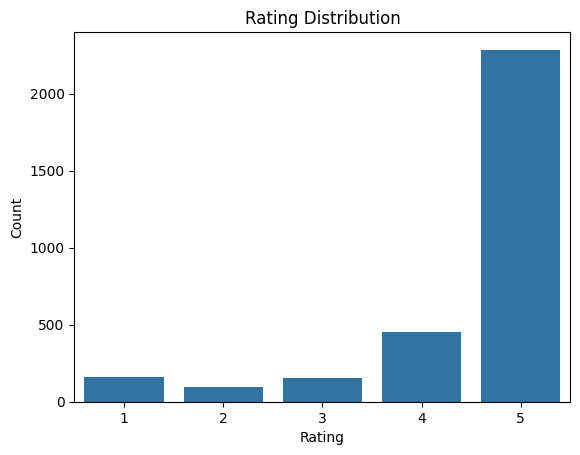

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='rating', data=df)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [ ]:
#df = df.drop(['helpful_vote'],axis=1)

In [ ]:
df

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1
...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,Black Dot,"Listening to music, searching locations, check...",1
3147,5,Black Dot,"I do love these things, i have them running my...",1
3148,5,White Dot,Only complaint I have is that the sound qualit...,1


DATA PROCESSING

In [ ]:
# Assuming 'df' is your pandas DataFrame
df = spark.createDataFrame(df)


Tokenization


In [ ]:
from pyspark.ml.feature import Tokenizer

# Initialize the Tokenizer
tokenizer = Tokenizer(inputCol="verified_reviews", outputCol="tokenized_words")

# Apply the tokenizer
df = tokenizer.transform(df)

# Display tokenized words
df.select("verified_reviews", "tokenized_words").show(5, truncate=False)


+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|verified_reviews                                                                                                                                                                                   |tokenized_words                                                                                                                                                                                                                            |
+-----------------------------------------------------------------------------------------------------------------------------------

Stop words removal


In [ ]:
from pyspark.ml.feature import StopWordsRemover

# Initialize StopWordsRemover
remover = StopWordsRemover(inputCol="tokenized_words", outputCol="filtered_words")

# Apply stopword removal
df = remover.transform(df)

# Display the words after stopword removal
df.select("verified_reviews", "filtered_words").show(5, truncate=False)


+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------+
|verified_reviews                                                                                                                                                                                   |filtered_words                                                                                                                           |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------

Lemmetization


In [ ]:
import spacy
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Define a UDF (User Defined Function) for lemmatization
def lemmatize_text(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

# Register the UDF
lemmatize_udf = udf(lemmatize_text, ArrayType(StringType()))

# Apply lemmatization
df = df.withColumn("lemmatized_words", lemmatize_udf(df["filtered_words"]))

# Show the lemmatized words
df.select("verified_reviews", "lemmatized_words").show(5, truncate=False)


+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------+
|verified_reviews                                                                                                                                                                                   |lemmatized_words                                                                                                                          |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------

Remove punctuation

In [ ]:

# Function to remove punctuation marks from a list of words
def remove_punctuation(tokens):
    return [word for word in tokens if re.match(r'[A-Za-z0-9]+', word)]

# Register the UDF
remove_punctuation_udf = udf(remove_punctuation, ArrayType(StringType()))

# Apply the UDF to remove punctuation marks
df = df.withColumn("lemmatized_words", remove_punctuation_udf(df["lemmatized_words"]))

# Show the cleaned lemmatized words
df.select("verified_reviews", "lemmatized_words").show(5, truncate=False)


+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------+
|verified_reviews                                                                                                                                                                                   |lemmatized_words                                                                                                              |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------+
|Love my Echo!           

FEATURE ENGINEERING

TF IDF


In [ ]:
from pyspark.ml.feature import HashingTF, IDF

# Step 1: Initialize HashingTF
hashing_tf = HashingTF(inputCol="filtered_words", outputCol="raw_features", numFeatures=10000)

# Step 2: Apply HashingTF to generate term frequency vectors
df = hashing_tf.transform(df)

# Step 3: Initialize IDF
idf = IDF(inputCol="raw_features", outputCol="features")

# Step 4: Fit and Transform the data using IDF to calculate TF-IDF
idf_model = idf.fit(df)
df = idf_model.transform(df)

# Step 5: Display the resulting DataFrame with TF-IDF features
df.select("verified_reviews", "filtered_words", "features").show(5, truncate=False)


+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|verified_reviews                                                                                                                                                                                   |filtered_word

In [ ]:
df.show(n=2, truncate=False)


+------+----------------+----------------+--------+-----------------+--------------+----------------+-----------------------------+----------------------------------------------------------+
|rating|variation       |verified_reviews|feedback|tokenized_words  |filtered_words|lemmatized_words|raw_features                 |features                                                  |
+------+----------------+----------------+--------+-----------------+--------------+----------------+-----------------------------+----------------------------------------------------------+
|5     |Charcoal Fabric |Love my Echo!   |1       |[love, my, echo!]|[love, echo!] |[love, echo]    |(10000,[5673,6240],[1.0,1.0])|(10000,[5673,6240],[5.857933154483459,1.3470736479666094])|
|5     |Charcoal Fabric |Loved it!       |1       |[loved, it!]     |[loved, it!]  |[love, it]      |(10000,[3457,3789],[1.0,1.0])|(10000,[3457,3789],[3.3546773660272624,4.293957616126116])|
+------+----------------+----------------+---

Model


In [ ]:
from pyspark.sql import functions as F
# Define the categorization logic and convert to 0 and 1
df = df.withColumn(
    'rating_category',
    F.when(df['rating'].isin([0, 1, 2]), 0)  # Negative ratings (0, 1, 2)
     .when(df['rating'].isin([3, 4, 5]), 1)  # Positive ratings (3, 4, 5)
     .otherwise(None)  # Assign None if unexpected values exist
)

# Show the first few records to verify
df.show(5)



+------+----------------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+
|rating|       variation|    verified_reviews|feedback|     tokenized_words|      filtered_words|    lemmatized_words|        raw_features|            features|rating_category|
+------+----------------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+
|     5|Charcoal Fabric |       Love my Echo!|       1|   [love, my, echo!]|       [love, echo!]|        [love, echo]|(10000,[5673,6240...|(10000,[5673,6240...|              1|
|     5|Charcoal Fabric |           Loved it!|       1|        [loved, it!]|        [loved, it!]|          [love, it]|(10000,[3457,3789...|(10000,[3457,3789...|              1|
|     4|  Walnut Finish |Sometimes while p...|       1|[sometimes, while...|[sometimes, playi...|[sometimes, play,.

In [ ]:
# Features (TF-IDF vectors)
X = df['features']

# Target (ratings)
y = df['rating_category']



In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import (
    MulticlassClassificationEvaluator,
    RegressionEvaluator
)
from pyspark.ml.classification import (
    DecisionTreeClassifier,
    RandomForestClassifier,
    GBTClassifier,
    LogisticRegression,
    MultilayerPerceptronClassifier,
    NaiveBayes
)
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import (
    MulticlassClassificationEvaluator,
    BinaryClassificationEvaluator
)
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.sql.functions import col, abs

In [ ]:
data = df.select(col("features"), col("rating_category").cast("double"))
train, test = data.randomSplit([0.8, 0.2], seed=42)
train = train.repartition(100)  # Increase the number of partitions


In [ ]:
multi_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
binary_evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction"
regression_evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction")

DECISION TREE

In [ ]:
decision_tree = DecisionTreeClassifier(labelCol="rating_category", featuresCol="features")

# Hyperparameter Tuning: Decision Tree
paramGrid = ParamGridBuilder().addGrid(decision_tree.maxDepth, [5, 10]) \
                               .addGrid(decision_tree.minInstancesPerNode, [1, 5]) \
                               .build()

# Cross-validation
crossval = CrossValidator(estimator=decision_tree,
                          estimatorParamMaps=paramGrid,
                          evaluator=multi_evaluator,
                          numFolds=5)
from pyspark.sql.functions import col

# Remove rows where the 'rating_category' column (label column) is null or NaN
df_cleaned = df.filter(df['rating_category'].isNotNull())

# Alternatively, you can remove rows where any column has null values
# df_cleaned = df.dropna()

# Proceed with training the model using the cleaned dataset
fitted_model = crossval.fit(df_cleaned)


In [ ]:
predictions = fitted_model.transform(test)

# Rename 'rating' to 'label' (if needed)
predictions = predictions.withColumnRenamed('rating_category', "label")  # Ensure that 'rating' column is renamed to 'label'

# 1. Accuracy
accuracy = multi_evaluator.setMetricName("accuracy").evaluate(predictions)

# 2. Precision
precision = multi_evaluator.setMetricName("weightedPrecision").evaluate(predictions)

# 3. Recall
recall = multi_evaluator.setMetricName("weightedRecall").evaluate(predictions)

# 4. F1-Score
f1_score = multi_evaluator.setMetricName("f1").evaluate(predictions)

# 5. AUC (Area Under ROC)
auc = binary_evaluator.setMetricName("areaUnderROC").evaluate(predictions)

# 6. RMSE (Root Mean Squared Error)
rmse = regression_evaluator.setMetricName("rmse").evaluate(predictions)

# 7. MSE (Mean Squared Error)
mse = regression_evaluator.setMetricName("mse").evaluate(predictions)

# 8. MAE (Mean Absolute Error)
mae = regression_evaluator.setMetricName("mae").evaluate(predictions)

# 9. R-squared
r2 = regression_evaluator.setMetricName("r2").evaluate(predictions)

# 10. MAPE (Mean Absolute Percentage Error)
mape = predictions.withColumn(
    "absolute_percentage_error",
    (abs(col("label") - col("prediction")) / col("label")) * 100
).select("absolute_percentage_error").agg({"absolute_percentage_error": "mean"}).first()[0]

# 11. ROC Curve (if needed)
roc_curve = predictions.select("rawPrediction", "label").rdd.map(
    lambda row: (float(row.rawPrediction[1]), float(row.label))
).collect()
roc_curve = sorted(roc_curve, key=lambda x: x[0], reverse=True)

# Print classification metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")
print(f"AUC: {auc}")

# Print regression metrics
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print(f"MAPE: {mape}")

# Print ROC Curve (first 10 points)
print("ROC Curve (score, label):")
for point in roc_curve[:10]:  # Display the first 10 points
    print(point)



Accuracy: 0.9301919720767888
Precision: 0.9236694414102226
Recall: 0.9301919720767888
F1-Score: 0.9138408338109161
AUC: 0.5440988655998797
RMSE: 0.26421208890437087
MSE: 0.06980802792321118
MAE: 0.06980802792321117
R-squared: 0.1390579220193825
MAPE: 0.5747126436781609
ROC Curve (score, label):
(2051.0, 0.0)
(2051.0, 0.0)
(2051.0, 0.0)
(2051.0, 1.0)
(2051.0, 1.0)
(2051.0, 1.0)
(2051.0, 1.0)
(2051.0, 1.0)
(2051.0, 1.0)
(2051.0, 0.0)


In [ ]:
from sklearn.metrics import roc_auc_score
predicted_labels = predictions.select("Prediction").rdd.flatMap(lambda x: x).collect()  # True labels
predicted_probs = predictions.select("probability").rdd.flatMap(lambda x: x).collect()  # Predicted probabilities

# Extract probabilities for the positive class (assumed to be at index 1)
positive_class_probs = [prob[1] for prob in predicted_probs]

# Calculate ROC AUC score
roc_auc = roc_auc_score(predicted_labels, positive_class_probs)

# Print the ROC AUC score
print(f"ROC AUC: {roc_auc}")

ROC AUC: 1.0


*Logistic* Regression


In [ ]:
from pyspark.ml.classification import LogisticRegression

# Define Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol="rating_category")


In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Set up the parameter grid for hyperparameter tuning
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.1, 0.01, 0.001])  # Regularization parameter
             .addGrid(lr.maxIter, [10, 50, 100])       # Number of iterations
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])  # ElasticNet regularization
             .build())

# Set up evaluator (binary for logistic regression)
binaryEvaluator = BinaryClassificationEvaluator(labelCol="rating_category", metricName="areaUnderROC")


In [ ]:
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=binaryEvaluator,
                          numFolds=3)  # Set number of folds for cross-validation


In [ ]:
# Fit the model on the training data
cvModel = crossval.fit(df_cleaned)

# Get the best model from cross-validation
bestModel = cvModel.bestModel


In [ ]:
# Predictions on test data
predictions = bestModel.transform(test)
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize evaluator
multiclass_evaluator = MulticlassClassificationEvaluator(labelCol="rating_category", predictionCol="prediction")

# 1. Accuracy
accuracy = multiclass_evaluator.setMetricName("accuracy").evaluate(predictions)
print(f"Accuracy: {accuracy}")

# 2. F1 Score
f1 = multiclass_evaluator.setMetricName("f1").evaluate(predictions)
print(f"F1 Score: {f1}")

# 3. Weighted Precision
weighted_precision = multiclass_evaluator.setMetricName("weightedPrecision").evaluate(predictions)
print(f"Weighted Precision: {weighted_precision}")

# 4. Weighted Recall
weighted_recall = multiclass_evaluator.setMetricName("weightedRecall").evaluate(predictions)
print(f"Weighted Recall: {weighted_recall}")


# 5. Area Under ROC (AUC)
roc_auc = binaryEvaluator.evaluate(predictions)

# 6. Area Under PR (Precision-Recall curve)
pr_auc = BinaryClassificationEvaluator(labelCol="rating_category", metricName="areaUnderPR").evaluate(predictions)

# Show metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print(f"ROC AUC: {roc_auc}")
print(f"PR AUC: {pr_auc}")

Accuracy: 0.9808027923211169
F1 Score: 0.9797426017569437
Weighted Precision: 0.9811989823482609
Weighted Recall: 0.9808027923211169
Accuracy: 0.9808027923211169
Precision: 0.9236694414102226
Recall: 0.9301919720767888
F1 Score: 0.9138408338109161
ROC AUC: 0.9922620389151829
PR AUC: 0.9992283400782832


In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import functions as F

# 1. RMSE (Root Mean Squared Error)
rmse_evaluator = RegressionEvaluator(labelCol="rating_category", predictionCol="prediction", metricName="rmse")
rmse = rmse_evaluator.evaluate(predictions)

# 2. MSE (Mean Squared Error)
mse_evaluator = RegressionEvaluator(labelCol="rating_category", predictionCol="prediction", metricName="mse")
mse = mse_evaluator.evaluate(predictions)

# 3. MAE (Mean Absolute Error)
mae_evaluator = RegressionEvaluator(labelCol="rating_category", predictionCol="prediction", metricName="mae")
mae = mae_evaluator.evaluate(predictions)

# 4. R-squared (R²)
r2_evaluator = RegressionEvaluator(labelCol="rating_category", predictionCol="prediction", metricName="r2")
r2 = r2_evaluator.evaluate(predictions)

# 5. MAPE (Mean Absolute Percentage Error)
# Compute MAPE manually as it is not directly available in Spark
mape = predictions.withColumn("mape",
                               F.abs((F.col("rating_category") - F.col("prediction")) / F.col("rating_category"))).agg(F.avg("mape")).collect()[0][0]

# Display the results
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print(f"MAPE: {mape}")


RMSE: 0.13855398831821145
MSE: 0.019197207678883072
MAE: 0.019197207678883072
R-squared: 0.7632409285553302
MAPE: 0.0


Gradient Boosted Tree (GBT)

In [ ]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator, RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml import Pipeline
from pyspark.sql import functions as F

# 1. Initialize GBT Model
gbt = GBTClassifier(featuresCol="features", labelCol="rating_category")

In [ ]:
param_grid = (ParamGridBuilder()
              .addGrid(gbt.maxDepth, [5, 10])
              .addGrid(gbt.maxIter, [50, 100])
              .addGrid(gbt.stepSize, [0.1, 0.3])
              .build())

# 3. CrossValidator for model selection
evaluator = BinaryClassificationEvaluator(labelCol="rating_category", metricName="areaUnderROC")
crossval = CrossValidator(estimator=gbt,
                          estimatorParamMaps=param_grid,
                          evaluator=evaluator,
                          numFolds=3)

In [ ]:
model = crossval.fit(df_cleaned)  # Make sure `train_data` is your training dataset

# 5. Make predictions
predictions = model.transform(test)

In [ ]:
from pyspark.sql import functions as F

# Add a column to check if predictions are correct
predictions = predictions.withColumn("correct", F.when(predictions.rating_category == predictions.prediction, 1).otherwise(0))

# Calculate accuracy
accuracy = predictions.agg(F.mean("correct")).collect()[0][0]
print("Accuracy:", accuracy)

# Calculate confusion matrix components
tp = predictions.filter((predictions.rating_category == 1) & (predictions.prediction == 1)).count()
tn = predictions.filter((predictions.rating_category == 0) & (predictions.prediction == 0)).count()
fp = predictions.filter((predictions.rating_category == 0) & (predictions.prediction == 1)).count()
fn = predictions.filter((predictions.rating_category == 1) & (predictions.prediction == 0)).count()

# Precision, Recall, F1-score
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="rating_category")

# ROC AUC
roc_auc = evaluator.setMetricName("areaUnderROC").evaluate(predictions)
print("ROC AUC:", roc_auc)

# PR AUC
pr_auc = evaluator.setMetricName("areaUnderPR").evaluate(predictions)
print("PR AUC:", pr_auc)

Accuracy: 0.9895287958115183
Precision: 0.9886363636363636
Recall: 1.0
F1-Score: 0.9942857142857142
ROC AUC: 0.9752084741942754
PR AUC: 0.9974774640805394


In [ ]:
rmse_evaluator = RegressionEvaluator(labelCol="rating_category", predictionCol="prediction", metricName="rmse")
rmse = rmse_evaluator.evaluate(predictions)
print("RMSE:", rmse)

# 6g. MSE (Mean Squared Error)
mse = rmse_evaluator.setMetricName("mse").evaluate(predictions)
print("MSE:", mse)

# 6h. MAE (Mean Absolute Error)
mae = rmse_evaluator.setMetricName("mae").evaluate(predictions)
print("MAE:", mae)

# 6i. R-squared (Coefficient of determination)
r2 = rmse_evaluator.setMetricName("r2").evaluate(predictions)
print("R-squared:", r2)

# 6j. MAPE (Mean Absolute Percentage Error)
mape = predictions.withColumn("mape", F.abs((F.col("rating_category") - F.col("prediction")) / F.col("rating_category")) * 100)
mape_value = mape.agg(F.avg("mape")).collect()[0][0]
print("MAPE:", mape_value)

RMSE: 0.10232890201933018
MSE: 0.010471204188481674
MAE: 0.010471204188481676
R-squared: 0.8708586883029075
MAPE: 0.0


Naive Bayes

In [ ]:
nb = NaiveBayes(featuresCol="features", labelCol="rating_category", predictionCol="prediction", probabilityCol="probability")

In [ ]:
# 3. Hyperparameter tuning
paramGrid = ParamGridBuilder() \
    .addGrid(nb.smoothing, [0.5, 1.0,1.5]) \
    .build()

crossval = CrossValidator(
    estimator=nb,
    estimatorParamMaps=paramGrid,
    evaluator=MulticlassClassificationEvaluator(labelCol="rating_category", metricName="accuracy"),
    numFolds=5
)


In [ ]:
cv_model = crossval.fit(train)

# Best model
best_model = cv_model.bestModel
print("Best model smoothing parameter:", best_model.getSmoothing())

Best model smoothing parameter: 1.5


In [ ]:
binary_evaluator = BinaryClassificationEvaluator(labelCol="rating_category", rawPredictionCol="probability")

roc_auc = binary_evaluator.setMetricName("areaUnderROC").evaluate(predictions)
pr_auc = binary_evaluator.setMetricName("areaUnderPR").evaluate(predictions)

# Multiclass evaluator for Accuracy, Precision, Recall, and F1-score
multi_evaluator = MulticlassClassificationEvaluator(labelCol="rating_category", predictionCol="prediction")

accuracy = multi_evaluator.setMetricName("accuracy").evaluate(predictions)
precision = multi_evaluator.setMetricName("weightedPrecision").evaluate(predictions)
recall = multi_evaluator.setMetricName("weightedRecall").evaluate(predictions)
f1_score = multi_evaluator.setMetricName("f1").evaluate(predictions)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")
print(f"ROC AUC: {roc_auc}")
print(f"PR AUC: {pr_auc}")

Accuracy: 0.9895287958115183
Precision: 0.9896477867682058
Recall: 0.9895287958115183
F1-Score: 0.9892314884068811
ROC AUC: 0.9752084741942754
PR AUC: 0.9974774640805394


In [ ]:
regression_rdd = predictions.select("rating_category", "prediction").rdd.map(lambda row: (row["rating_category"], row["prediction"]))

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

true_labels = [row[0] for row in regression_rdd.collect()]
predicted_labels = [row[1] for row in regression_rdd.collect()]

rmse = mean_squared_error(true_labels, predicted_labels, squared=False)
mse = mean_squared_error(true_labels, predicted_labels)
mae = mean_absolute_error(true_labels, predicted_labels)
r_squared = r2_score(true_labels, predicted_labels)
predictions = predictions.withColumn(
    "absolute_percentage_error",
    F.when(
        predictions["rating_category"] != 0,
        F.abs((predictions["rating_category"] - predictions["prediction"]) / predictions["rating_category"])
    ).otherwise(None)  # Avoid division by zero
)

# Compute the mean of absolute percentage error (MAPE)
mape = predictions.select(F.avg("absolute_percentage_error")).collect()[0][0]



# 6. Print metrics
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R-squared: {r_squared}")
print(f"MAPE: {mape}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 0.10232890201933018
MSE: 0.010471204188481676
MAE: 0.010471204188481676
R-squared: 0.8708586883029074
MAPE: 0.0


MLP

In [ ]:
from pyspark.ml.linalg import Vectors

# Let's assume 'features' is the column containing the feature vectors
df = train  # Assuming 'train' is your training DataFrame

# Show the first few rows of the DataFrame to check the structure
df.select('features').show(5)

# Get the number of features by accessing the vector's size
num_features = df.select('features').head()[0].size
print(f"Number of features: {num_features}")


+--------------------+
|            features|
+--------------------+
|(10000,[750,760,5...|
|(10000,[6240],[1....|
|(10000,[288,585,1...|
|(10000,[552,1077,...|
|(10000,[446,1634,...|
+--------------------+
only showing top 5 rows

Number of features: 10000


In [ ]:


layers = [10000, 4, 3, 2]  # Example for 5 features, 4 neurons in the first hidden layer, 3 in the second, and 2 output classes
classifier = MultilayerPerceptronClassifier(layers=layers)

# Step 7: Initialize the Multilayer Perceptron Classifier
mlp = MultilayerPerceptronClassifier(featuresCol="features", labelCol="rating_category", maxIter=100, layers=layers, blockSize=128, seed=42)

In [ ]:
from pyspark.ml.feature import VectorAssembler

feature_columns = ['rating_category']  # Replace with your feature column names
assembler = VectorAssembler(inputCols=feature_columns, outputCol="featuresa")
assembled_data = assembler.transform(train)


In [ ]:
param_grid = (
    ParamGridBuilder()
    .addGrid(mlp.stepSize, [0.03, 0.1])
    .addGrid(mlp.maxIter, [100, 200])
    .build()
)

# Step 9: Set up the cross-validator
evaluator = MulticlassClassificationEvaluator(labelCol="rating_category", metricName="accuracy")
crossval = CrossValidator(
    estimator=mlp,
    estimatorParamMaps=param_grid,
    evaluator=evaluator,
    numFolds=3,
)

In [ ]:
cv_model = crossval.fit(train)
predictions = cv_model.transform(test)

In [ ]:
accuracy = evaluator.setMetricName("accuracy").evaluate(predictions)

precision_evaluator = MulticlassClassificationEvaluator(labelCol="rating_category", metricName="weightedPrecision")
precision = precision_evaluator.evaluate(predictions)

# 3. Recall
recall_evaluator = MulticlassClassificationEvaluator(labelCol="rating_category", metricName="weightedRecall")
recall = recall_evaluator.evaluate(predictions)

# 4. F1 Score
f1_evaluator = MulticlassClassificationEvaluator(labelCol="rating_category", metricName="f1")
f1_score = f1_evaluator.evaluate(predictions)

# 5. ROC-AUC
roc_evaluator = BinaryClassificationEvaluator(labelCol="rating_category", metricName="areaUnderROC")
roc_auc = roc_evaluator.evaluate(predictions)

# 6. PR-AUC
pr_auc_evaluator = BinaryClassificationEvaluator(labelCol="rating_category", metricName="areaUnderPR")
pr_auc = pr_auc_evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print(f"ROC-AUC: {roc_auc}")
print(f"PR-AUC: {pr_auc}")

Accuracy: 0.9197207678883071
Precision: 0.9197207678883071
Recall: 0.9197207678883071
F1 Score: 0.9197207678883071
ROC-AUC: 0.8516452558034707
PR-AUC: 0.9509684535644797


In [ ]:
# 7. RMSE
rmse = predictions.select(F.sqrt(F.avg((F.col("rating_category") - F.col("prediction")) ** 2))).collect()[0][0]

# 8. MSE
mse = predictions.select(F.avg((F.col("rating_category") - F.col("prediction")) ** 2)).collect()[0][0]

# 9. MAE
mae = predictions.select(F.avg(F.abs(F.col("rating_category") - F.col("prediction")))).collect()[0][0]

# 10. R²
mean_label = predictions.select(F.avg("rating_category")).collect()[0][0]
ss_total = predictions.select(F.sum((F.col("rating_category") - mean_label) ** 2)).collect()[0][0]
ss_residual = predictions.select(F.sum((F.col("rating_category") - F.col("prediction")) ** 2)).collect()[0][0]
r2 = 1 - (ss_residual / ss_total)

# 11. MAPE
predictions = predictions.withColumn(
    "absolute_percentage_error",
    F.when(
        predictions["rating_category"] != 0,
        F.abs((predictions["rating_category"] - predictions["prediction"]) / predictions["rating_category"])
    ).otherwise(None)
)
mape = predictions.select(F.avg("absolute_percentage_error")).collect()[0][0]

print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")
print(f"MAPE: {mape}")

RMSE: 0.2833358997933245
MSE: 0.08027923211169284
MAE: 0.08027923211169284
R²: 0.009916610322294406
MAPE: 0.044061302681992334


Random Forest

In [ ]:
import numpy as np
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Initialize the Random Forest classifier with correct parameters
rf = RandomForestClassifier(featuresCol="features", labelCol="rating_category", seed=42)


# Define the parameter grid for hyperparameter tuning
paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [50, 100]) \
    .addGrid(rf.maxDepth, [5, 10]) \
    .addGrid(rf.maxBins, [32, 64]) \
    .build()

# Define evaluators for binary and multi-class metrics
binary_evaluator = BinaryClassificationEvaluator(labelCol="rating_category", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
multi_evaluator = MulticlassClassificationEvaluator(labelCol="rating_category", predictionCol="prediction")

In [ ]:
# Set up cross-validation
crossval = CrossValidator(estimator=rf,
                          estimatorParamMaps=paramGrid,
                          evaluator=binary_evaluator,
                          numFolds=5)  # 5-fold cross-validation

# Train the model
cvModel = crossval.fit(train)

# Get the best model from cross-validation
bestModel = cvModel.bestModel

# Make predictions on the test data
predictions = bestModel.transform(test)

In [ ]:

from pyspark.sql.functions import col, abs, when
# Initialize evaluators for classification metrics
accuracy_evaluator = MulticlassClassificationEvaluator(
    labelCol="rating_category", predictionCol="prediction", metricName="accuracy"
)
f1_evaluator = MulticlassClassificationEvaluator(
    labelCol="rating_category", predictionCol="prediction", metricName="f1"
)
precision_evaluator = MulticlassClassificationEvaluator(
    labelCol="rating_category", predictionCol="prediction", metricName="weightedPrecision"
)
recall_evaluator = MulticlassClassificationEvaluator(
    labelCol="rating_category", predictionCol="prediction", metricName="weightedRecall"
)
auc_evaluator = BinaryClassificationEvaluator(
    labelCol="rating_category", rawPredictionCol="rawPrediction", metricName="areaUnderROC"
)

# Metrics computation
accuracy = accuracy_evaluator.evaluate(predictions)
f1_score = f1_evaluator.evaluate(predictions)
precision = precision_evaluator.evaluate(predictions)
recall = recall_evaluator.evaluate(predictions)
auc_roc = auc_evaluator.evaluate(predictions)  # AUC ROC

# Compute additional metrics
# Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), MAPE
predictions = predictions.withColumn("error", abs(col("rating_category") - col("prediction")))
mae = predictions.agg({"error": "avg"}).collect()[0][0]

mse = predictions.withColumn("squared_error", (col("rating_category") - col("prediction")) ** 2).agg({"squared_error": "avg"}).collect()[0][0]
rmse = mse ** 0.5

# Mean Absolute Percentage Error (MAPE)
mape = predictions.withColumn("percentage_error", when(col("rating_category") != 0, abs(col("error") / col("rating_category"))).otherwise(0)) \
    .agg({"percentage_error": "avg"}).collect()[0][0]

# R-squared (custom calculation)
mean_label = test.select("rating_category").groupBy().mean().collect()[0][0]
sst = test.withColumn("sst", (col("rating_category") - mean_label) ** 2).agg({"sst": "sum"}).collect()[0][0]
ssr = predictions.withColumn("ssr", (col("rating_category") - col("prediction")) ** 2).agg({"ssr": "sum"}).collect()[0][0]
r_squared = 1 - (ssr / sst)

# AUC Score Calculation (area under precision-recall curve)
auc_pr_evaluator = BinaryClassificationEvaluator(
    labelCol="rating_category", rawPredictionCol="rawPrediction", metricName="areaUnderPR"
)
auc_pr = auc_pr_evaluator.evaluate(predictions)

# Print results
print("Metrics:")
print(f"Accuracy: {accuracy}")
print(f"F1-Score: {f1_score}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC ROC: {auc_roc}")
print(f"AUC (PR Curve): {auc_pr}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"R-squared: {r_squared}")

Metrics:
Accuracy: 0.9109947643979057
F1-Score: 0.8685648712615649
Precision: 0.8299114607603958
Recall: 0.9109947643979057
AUC ROC: 0.814382841259109
AUC (PR Curve): 0.9791967533690906
MAE: 0.08900523560209424
MSE: 0.08900523560209424
RMSE: 0.2983374525635262
MAPE: 0.0
R-squared: -0.09770114942528241


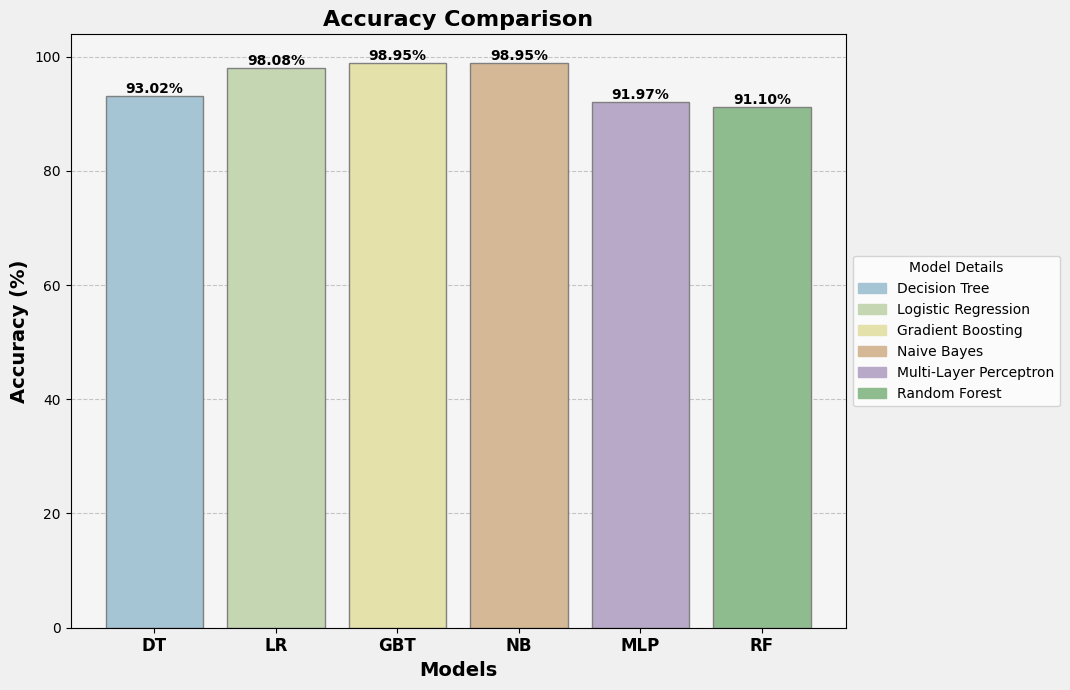

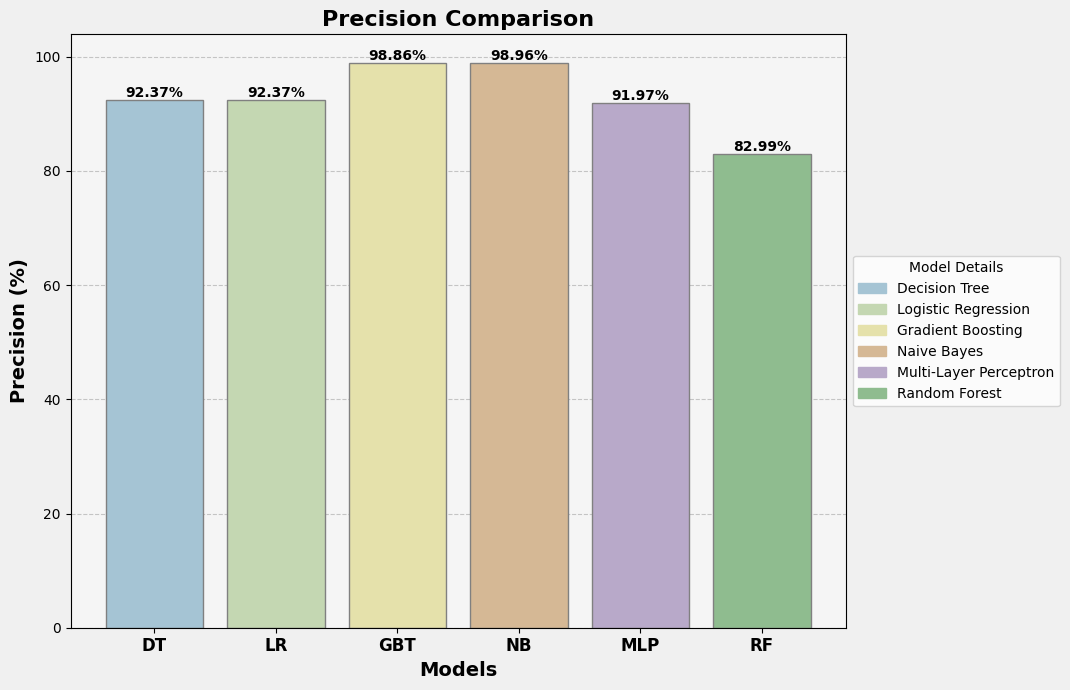

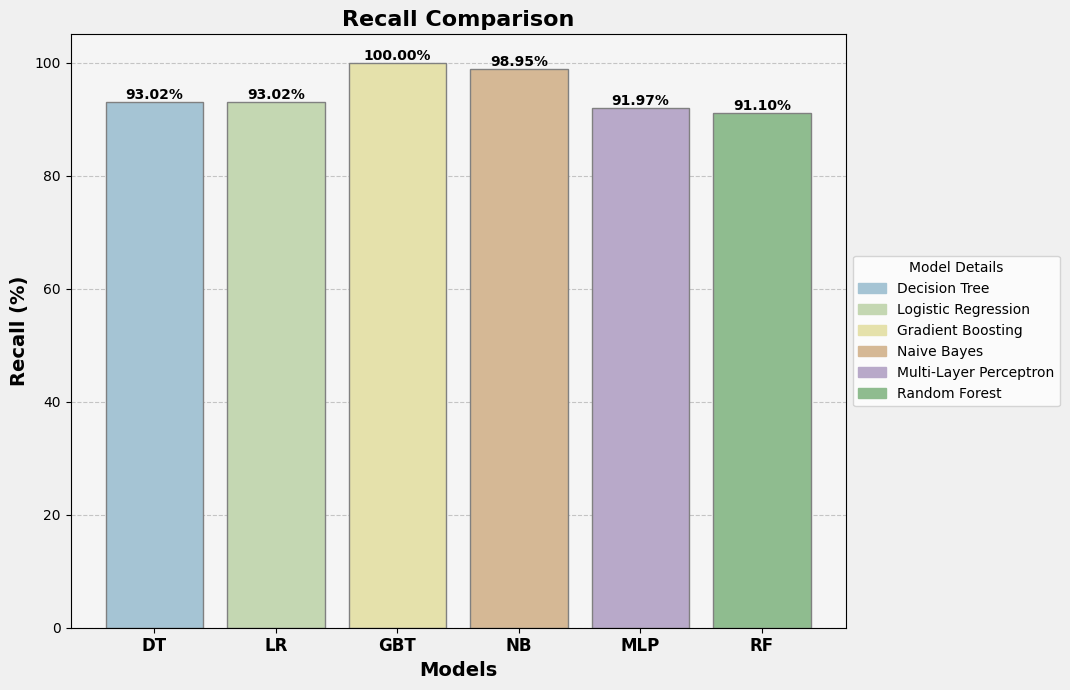

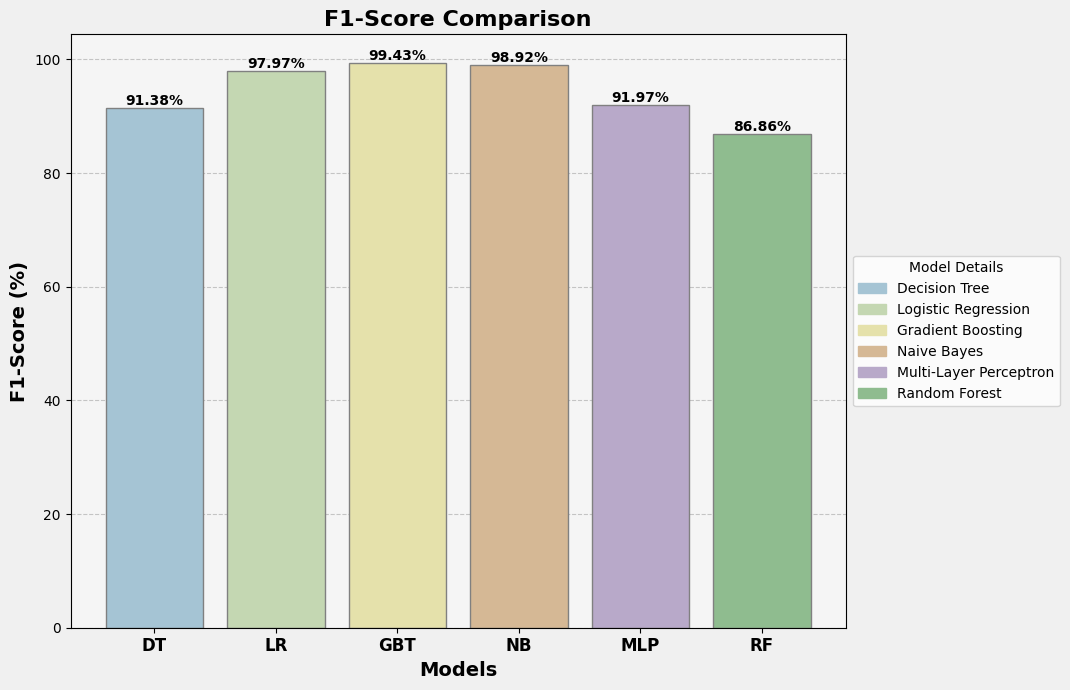

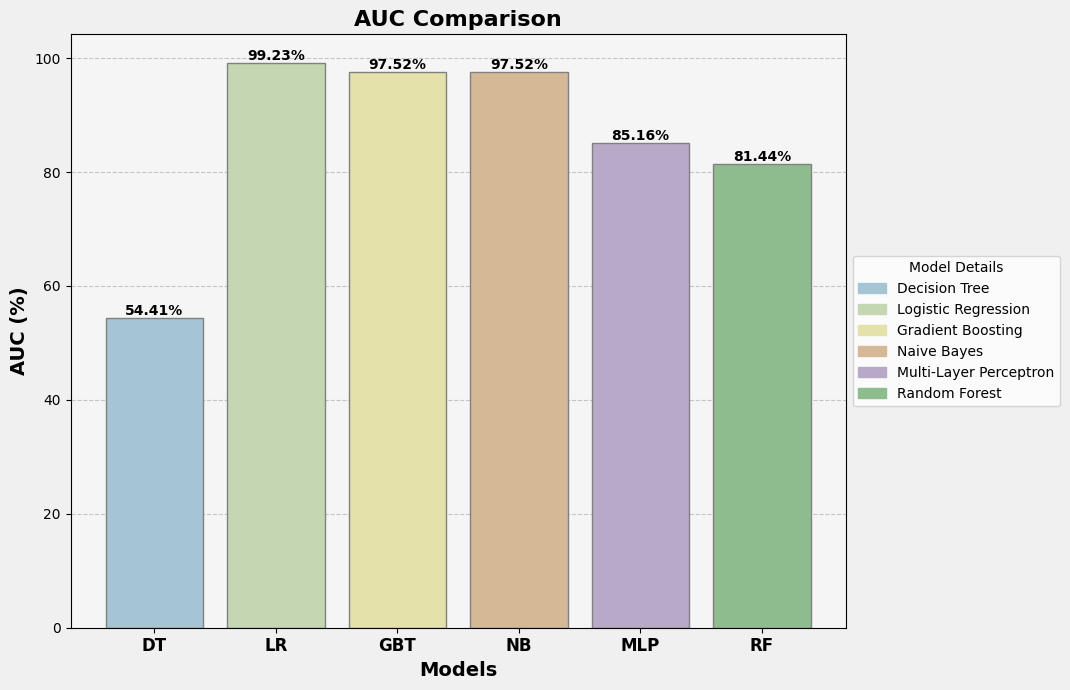

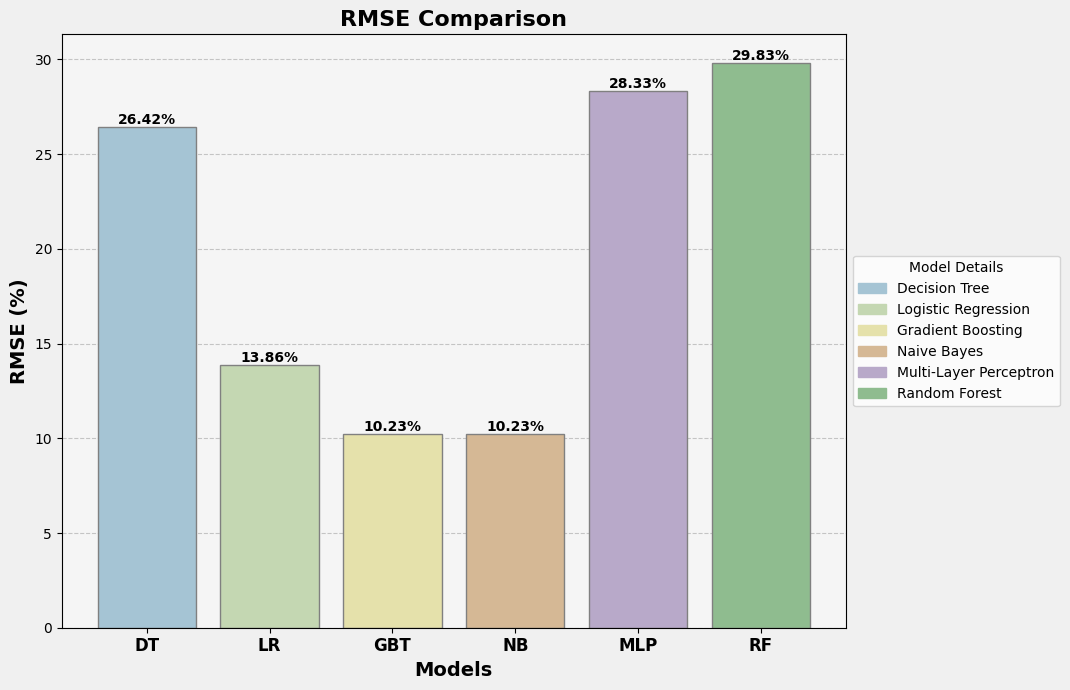

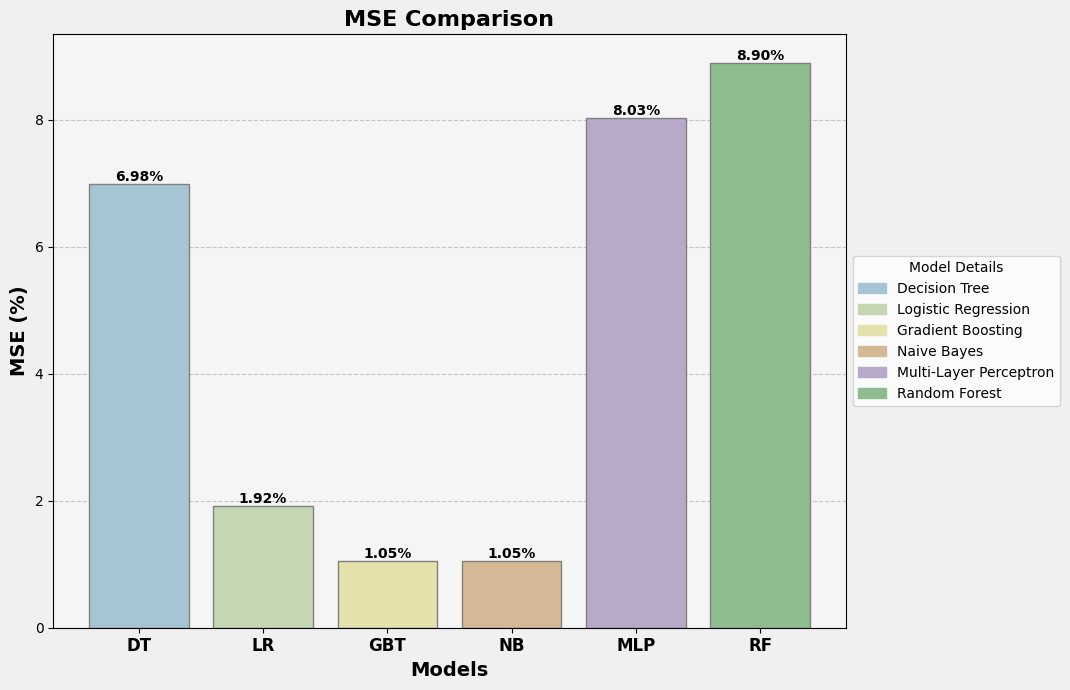

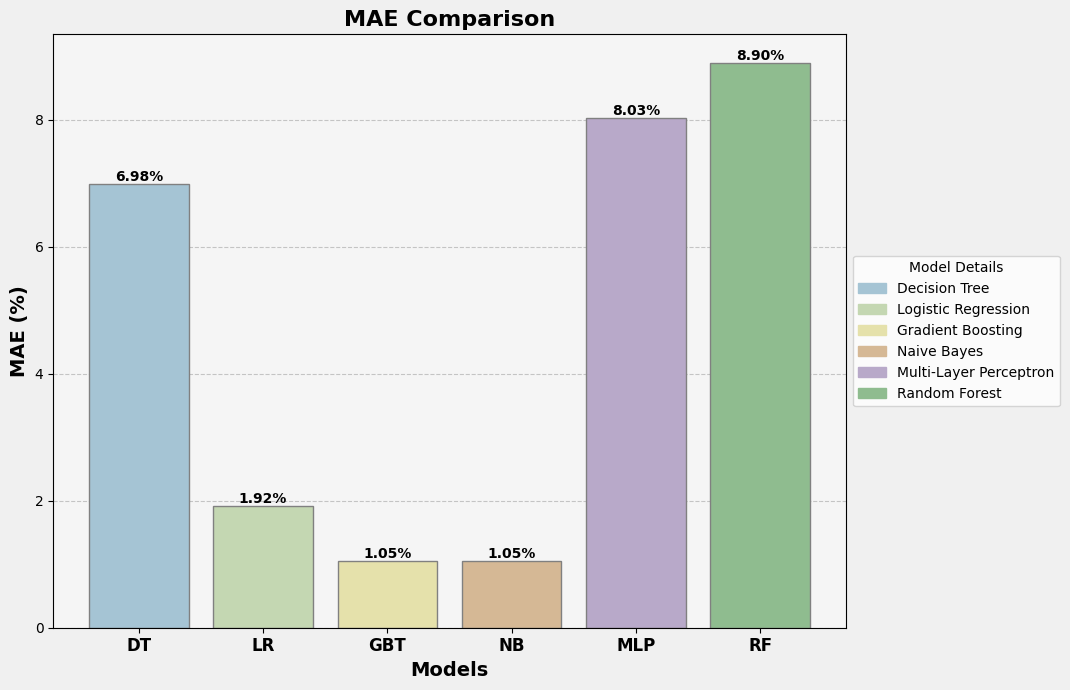

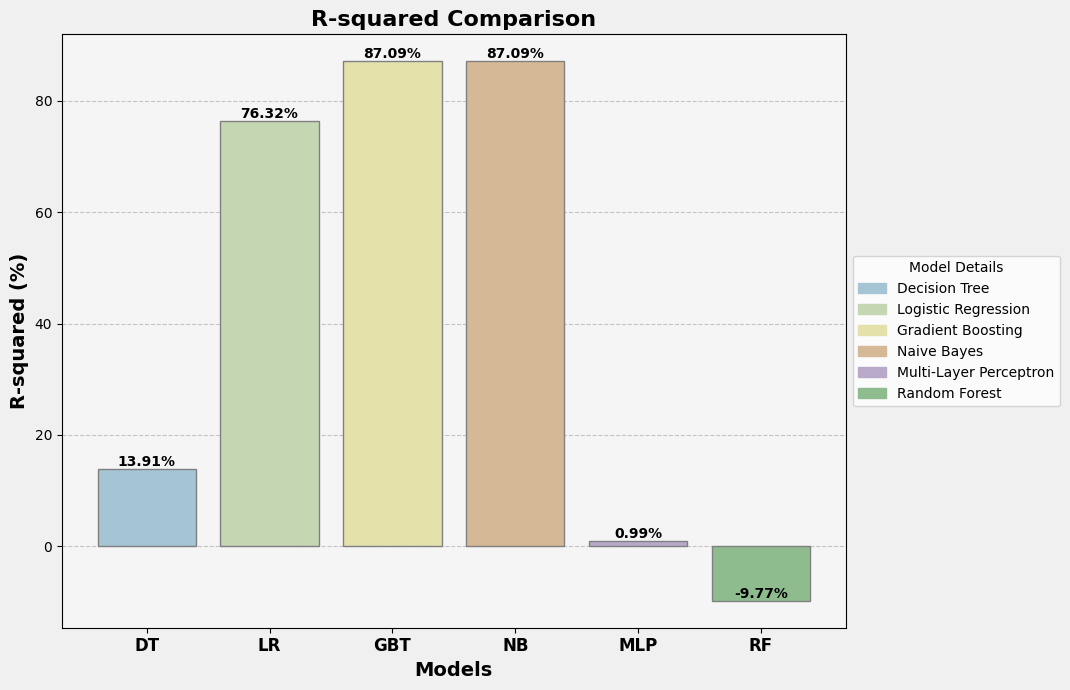

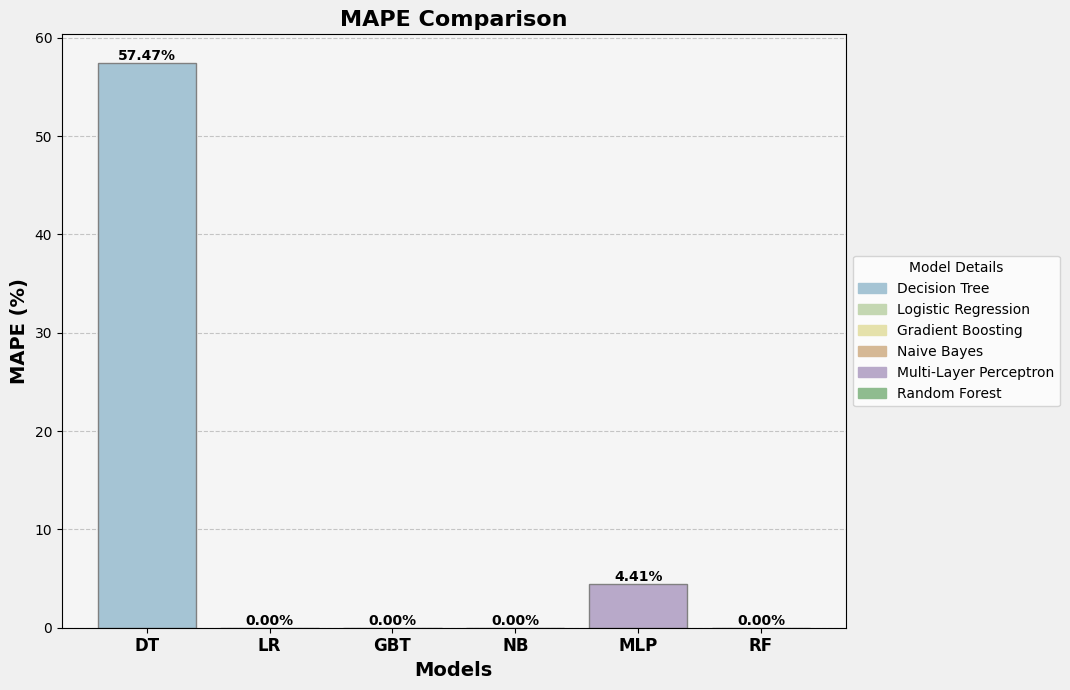

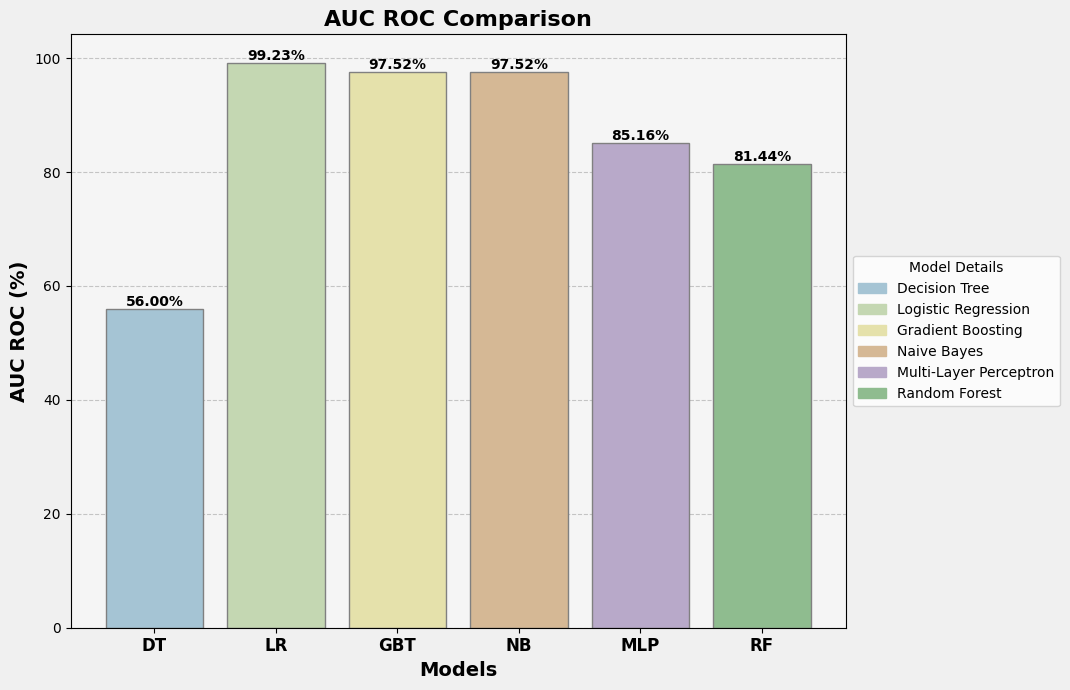

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['DT', 'LR', 'GBT', 'NB', 'MLP', 'RF']  # Added 'RF' for Random Forest
model_names = ['Decision Tree', 'Logistic Regression', 'Gradient Boosting', 'Naive Bayes', 'Multi-Layer Perceptron', 'Random Forest']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC', 'RMSE', 'MSE', 'MAE', 'R-squared', 'MAPE', 'AUC ROC']
metric_values = {
    'Accuracy': [0.9301919720767888, 0.9808027923211169, 0.9895287958115183, 0.9895287958115183, 0.9197207678883071, 0.9109947643979057],
    'Precision': [0.9236694414102226, 0.9236694414102226, 0.9886363636363636, 0.9896477867682058, 0.9197207678883071, 0.8299114607603958],
    'Recall': [0.9301919720767888, 0.9301919720767888, 1.0, 0.9895287958115183, 0.9197207678883071, 0.9109947643979057],
    'F1-Score': [0.9138408338109161, 0.9797426017569437, 0.9942857142857142, 0.9892314884068811, 0.9197207678883071, 0.8685648712615649],
    'AUC': [0.5440988655998797, 0.9922620389151829, 0.9752084741942754, 0.9752084741942754, 0.8516452558034707, 0.814382841259109],
    'RMSE': [0.26421208890437087, 0.13855398831821145, 0.10232890201933018, 0.10232890201933018, 0.2833358997933245, 0.2983374525635262],
    'MSE': [0.06980802792321118, 0.019197207678883072, 0.010471204188481674, 0.010471204188481676, 0.08027923211169284, 0.08900523560209424],
    'MAE': [0.06980802792321117, 0.019197207678883072, 0.010471204188481676, 0.010471204188481676, 0.08027923211169284, 0.08900523560209424],
    'R-squared': [0.1390579220193825, 0.7632409285553302, 0.8708586883029075, 0.8708586883029074, 0.009916610322294406, -0.09770114942528241],
    'MAPE': [0.5747126436781609, 0.0, 0.0, 0.0, 0.044061302681992334, 0.0],
    'AUC ROC': [0.56, 0.9922620389151829, 0.9752084741942754, 0.9752084741942754, 0.8516452558034707, 0.814382841259109]
}

# Soft, muted color palette
colors = [
    '#A5C4D4',    # Soft Blue Gray (Decision Tree)
    '#C4D7B2',    # Sage Green (Logistic Regression)
    '#E5E1AB',    # Soft Khaki (Gradient Boosting)
    '#D5B895',    # Warm Taupe (Naive Bayes)
    '#B8A9C9',    # Soft Lavender (Multi-Layer Perceptron)
    '#8FBC8F', #(Random Forest)
]

# Create individual plots with more detailed styling
for metric in metrics:
    plt.figure(figsize=(12, 7), facecolor='#F0F0F0')

    # Create axes with a light gray background
    ax = plt.gca()
    ax.set_facecolor('#F5F5F5')

    # Add shadow effect
    for i, (model, value, color) in enumerate(zip(models, metric_values[metric], colors)):
        # Shadow bar
        plt.bar(model, value * 100,
                color='lightgray',
                alpha=0.4,  # Subtle shadow
                edgecolor='none',
                width=0.8,
                zorder=1,
        )

        # Main bar
        plt.bar(model, value * 100,
                color=color,
                edgecolor='gray',
                linewidth=1,
                width=0.8,
                zorder=2)

    # Customize plot
    plt.xlabel('Models', fontsize=14, fontweight='bold')
    plt.ylabel(f'{metric} (%)', fontsize=14, fontweight='bold')
    plt.title(f'{metric} Comparison', fontsize=16, fontweight='bold')
    plt.xticks(range(len(models)), models, fontsize=12, fontweight='bold')

    # Add number labels above each bar with 2 decimal points
    for i, (model, value) in enumerate(zip(models, metric_values[metric])):
        plt.text(i, value * 100,
                 f'{value*100:.2f}%',
                 ha='center', va='bottom',
                 fontsize=10,
                 fontweight='bold',
                 zorder=3)

    # Add legend outside of the plot area to avoid hiding bars
    plt.legend([plt.Rectangle((0,0),1,1, color=c) for c in colors],
               model_names,
               title='Model Details',
               loc='center left',
               bbox_to_anchor=(1, 0.5),
               fontsize=10)

    # Improve layout
    plt.tight_layout(rect=[0, 0, 0.9, 1])
    plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

    plt.show()
